# ASSIGNMENT 3
## EKLAVYA SHARMA
### 8902545

In [1]:
# 1. Load the dataset and select the desired features

from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
petal_data = data[['petal length (cm)', 'petal width (cm)']]

In [3]:
# 2. Preprocess the data: Scaling

scaler = StandardScaler()
scaled_data = scaler.fit_transform(petal_data)

In [4]:
# 3. Determine the optimal number of clusters

sum_of_squared_distances = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    sum_of_squared_distances.append(km.inertia_)

c:\Users\ekyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ekyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ekyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ekyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

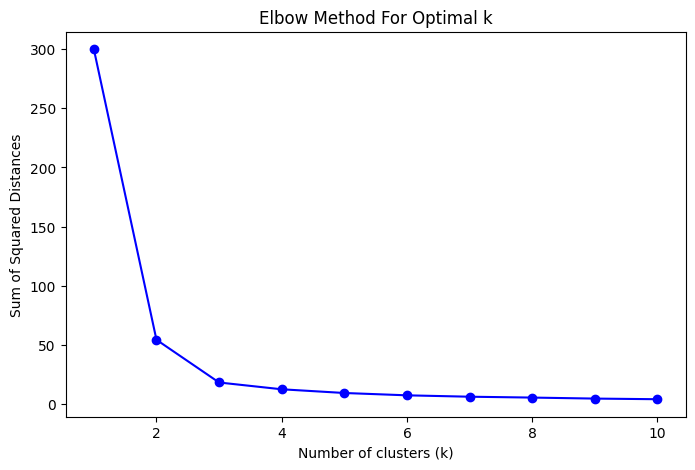

In [5]:
# Plot the elbow curve

plt.figure(figsize=(8, 5))
plt.plot(K, sum_of_squared_distances, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### 3 looks like the point of influx, so we will choose 3 centroids and let's try to display them

In [7]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_data)

c:\Users\ekyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


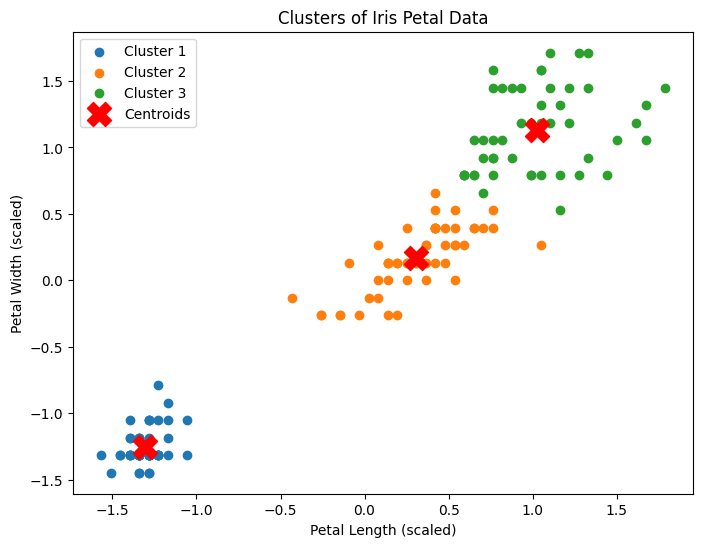

In [8]:
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(scaled_data[clusters == i, 0], scaled_data[clusters == i, 1], label=f'Cluster {i+1}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Clusters of Iris Petal Data')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.legend()
plt.show()

### question 2

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
heart_df = pd.read_csv(r"C:\Users\ekyus\Downloads\heart.csv")
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Loop to display unique number of classes for each categorical variable
for col in heart_df.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print("Unique Values and Counts:")
    print(heart_df[col].value_counts())


Column: Sex
Unique Values and Counts:
Sex
M    725
F    193
Name: count, dtype: int64
Column: ChestPainType
Unique Values and Counts:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
Column: RestingECG
Unique Values and Counts:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
Column: ExerciseAngina
Unique Values and Counts:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
Column: ST_Slope
Unique Values and Counts:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [37]:
## RestingECG and Sex have only two classes

In [14]:
## The output variable class balance and the number of null values in the dataset
heart_df['HeartDisease'].value_counts() ,"\n",heart_df.isnull().sum()

(HeartDisease
 1    508
 0    410
 Name: count, dtype: int64,
 '\n',
 Age               0
 Sex               0
 ChestPainType     0
 RestingBP         0
 Cholesterol       0
 FastingBS         0
 RestingECG        0
 MaxHR             0
 ExerciseAngina    0
 Oldpeak           0
 ST_Slope          0
 HeartDisease      0
 dtype: int64)

Yay, no outliers

In [15]:
# Removing outliers using Z-score
numeric_cols = heart_df.select_dtypes(include=[np.number]).columns.tolist()
z_scores = np.abs(zscore(heart_df[numeric_cols]))
outliers = (z_scores > 3)
heart_df_no_outliers = heart_df[~outliers.any(axis=1)]
heart_df_no_outliers.shape

(899, 12)

In [16]:
## number of values removed
heart_df.shape[1] - heart_df_no_outliers.shape[1]

0

We'll use label encoding for columns with two categories and one-hot encoding for columns with more than two categories.

In [17]:
# Label Encoding
label_encode_cols = ['Sex', 'ExerciseAngina']
le = LabelEncoder()
for col in label_encode_cols:
    heart_df_no_outliers[col] = le.fit_transform(heart_df_no_outliers[col])

C:\Users\ekyus\AppData\Local\Temp\ipykernel_16236\2594318214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_df_no_outliers[col] = le.fit_transform(heart_df_no_outliers[col])
C:\Users\ekyus\AppData\Local\Temp\ipykernel_16236\2594318214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_df_no_outliers[col] = le.fit_transform(heart_df_no_outliers[col])


In [18]:
# One-Hot Encoding
one_hot_encode_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
heart_df_encoded = pd.get_dummies(heart_df_no_outliers, columns=one_hot_encode_cols)

In [19]:
# Splitting and Scaling the data
X = heart_df_encoded.drop("HeartDisease", axis=1)
y = heart_df_encoded["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# SVM Models
svm = SVC(kernel='linear', random_state=45)
svm.fit(X_train_scaled, y_train)
svm_predictions = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_accuracy_report = classification_report(y_test, svm_predictions)
print(svm_accuracy)
print(svm_accuracy_report)


0.8481481481481481
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       119
           1       0.84      0.90      0.87       151

    accuracy                           0.85       270
   macro avg       0.85      0.84      0.84       270
weighted avg       0.85      0.85      0.85       270



In [28]:
# Train and evaluate logistic regression model
logreg = LogisticRegression(random_state=45, max_iter=1000)
logreg.fit(X_train_scaled, y_train)
logreg_predictions = logreg.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_accuracy_report = classification_report(y_test, logreg_predictions)
print(logreg_accuracy)
print(logreg_accuracy_report)


0.8444444444444444
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       119
           1       0.84      0.89      0.86       151

    accuracy                           0.84       270
   macro avg       0.84      0.84      0.84       270
weighted avg       0.84      0.84      0.84       270



In [29]:
# Train and evaluate random forest model
rf = RandomForestClassifier(random_state=45)
rf.fit(X_train_scaled, y_train)
rf_predictions = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_accuracy_report = classification_report(y_test, rf_predictions)
print(rf_accuracy)
print(rf_accuracy_report)

0.8555555555555555
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       119
           1       0.85      0.89      0.87       151

    accuracy                           0.86       270
   macro avg       0.86      0.85      0.85       270
weighted avg       0.86      0.86      0.86       270



In [34]:
# Applying PCA
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Retraining the random forest model on the reduced data
rf_pca = RandomForestClassifier(random_state=45)
rf_pca.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=45)

In [35]:
# Predictions using the random forest model with reduced features
rf_pca_predictions = rf_pca.predict(X_test_pca)

# Evaluating the performance of the new model
rf_pca_accuracy = accuracy_score(y_test, rf_pca_predictions)
rf_pca_accuracy_report = classification_report(y_test, rf_pca_predictions)

In [38]:
print(f"Accuracy after PCA: {rf_pca_accuracy:.2f}")
print("Classification Report after PCA:")
print(rf_pca_accuracy_report)

Accuracy after PCA: 0.82
Classification Report after PCA:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       119
           1       0.82      0.88      0.85       151

    accuracy                           0.82       270
   macro avg       0.82      0.81      0.82       270
weighted avg       0.82      0.82      0.82       270



### now we can observe a slight dip in the accuracy, 3% this is because of reduced number of dimensions so some info is lost